In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from vis.utils import configure_mpl
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import os

datadir = './data'
postdir = os.path.join(datadir, 'Post')
imagesize = 500
byteorder = 'big'

CBARPROPS = {

    'position' : 'right', 
    'size' : '1%', 
    'pad' : 0

}

GLOBCMAP = 'hot'
AXISLABEL = {

    'labelpad' : 15

}

<AxesSubplot:xlabel='time'>

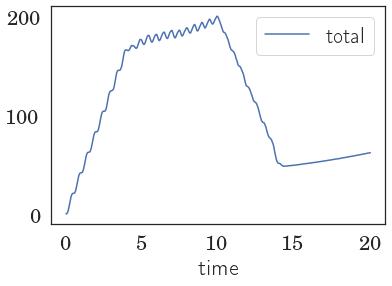

In [88]:
nopostfile = os.path.join(datadir, 'energy-1')
energy = pd.read_fwf(nopostfile).drop('#', axis=1)
energy.plot(x='time', y='total')

In [3]:
def read_bytes(fname, imsize):
    image = []

    with open(fname, 'rb') as f:
        while (byte := f.read(1)):
            image.append(int.from_bytes(byte, byteorder))
    
    f.close()
    image = np.array(image).reshape(imsize, imsize)

    return image

In [84]:
def plot_density(kind='e', postdir=postdir, imagesize=imagesize, tlim=(0, 20), xlim=(0, 166), maxne=5):
    
    if kind == 'e':
        postfile = os.path.join(postdir, 'spacetime-de')
        cbar_label = r'$n_e\,/\,n_c$'
    
    else:
        raise ValueError

    configure_mpl()

    @ticker.FuncFormatter
    def major_formatter(x, pos):
        return r'' + f'${x * maxne / 255:.2f}$'

    density_el = read_bytes(postfile, imagesize)

    fig, ax = plt.subplots(figsize=(10, 10))
    aspect = (xlim[1] - xlim[0]) / (tlim[1] - tlim[0])
    dens = ax.imshow(density_el, cmap=GLOBCMAP, origin='lower', extent=[*xlim, *tlim], aspect=aspect)

    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes(**CBARPROPS)
    cbar = plt.colorbar(dens, fraction=0.0457, pad=0.04)
    cbar.set_label(cbar_label, labelpad=AXISLABEL['labelpad'])
    cbar.locator = ticker.MultipleLocator(50)
    cbar.formatter = major_formatter
    cbar.update_ticks()
    

    ax.set_xlabel(r'$z,\:\,\rm{cell}$', labelpad=AXISLABEL['labelpad'])
    ax.set_ylabel(r'$t,\:\,\rm{period}$', labelpad=AXISLABEL['labelpad'])

    return fig

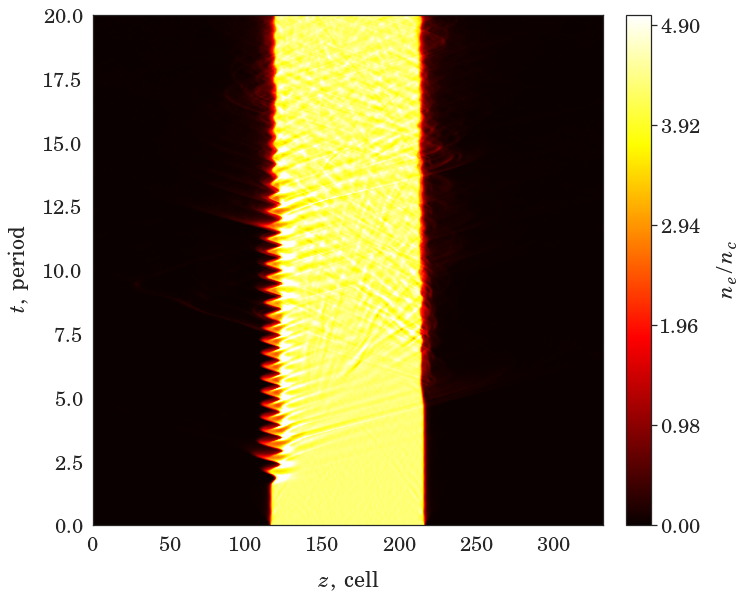

In [98]:
fig = plot_density(kind='e', imagesize=imagesize, xlim=(0, 332))
#fig.savefig('../../tex/components/img/lpic/lpic_lowres_1.pdf', bbox_inches='tight')